In [22]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [23]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\Salman\anacondaUpdated\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Salman\anacondaUpdated\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Salman\anacondaUpdated\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

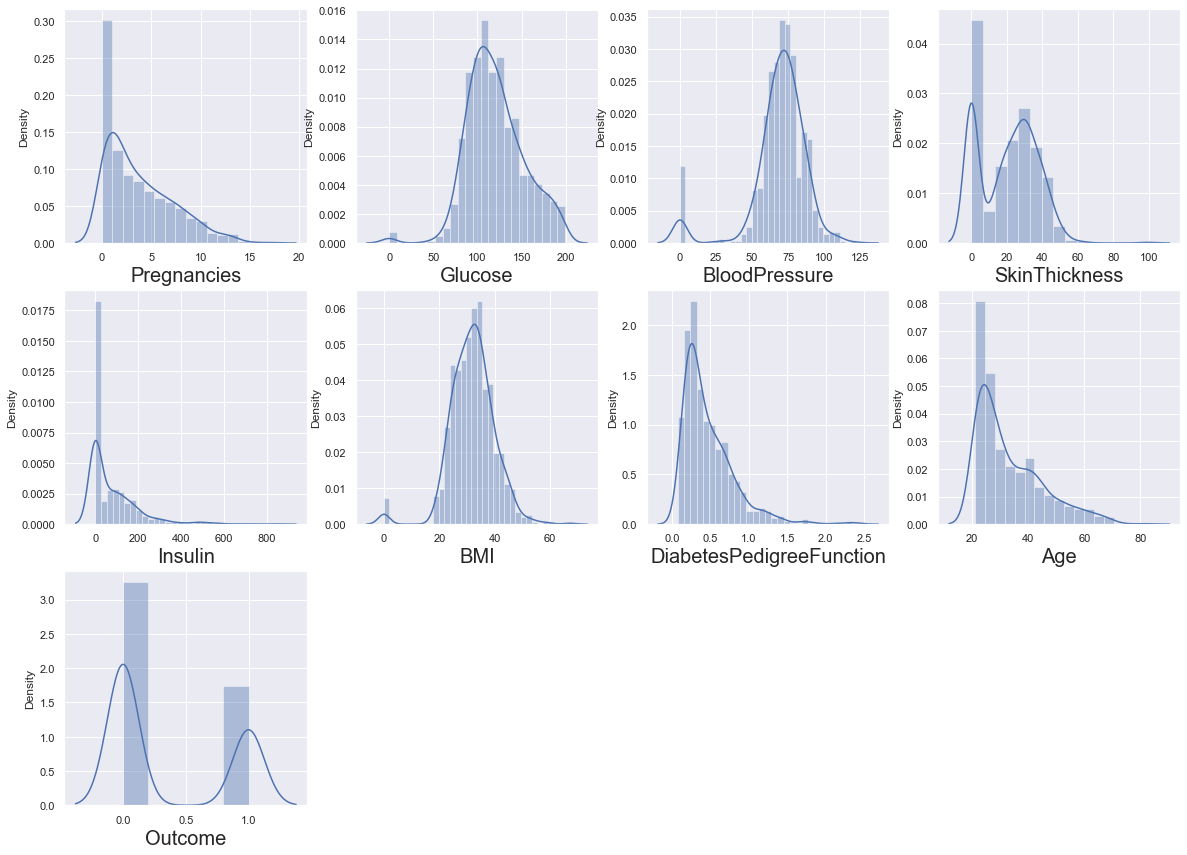

In [25]:
# No missing values, see the distribution of all columns:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <=9:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [26]:
# Data is skewed, replacing 0 values with the means:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

C:\Users\Salman\anacondaUpdated\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Salman\anacondaUpdated\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Salman\anacondaUpdated\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

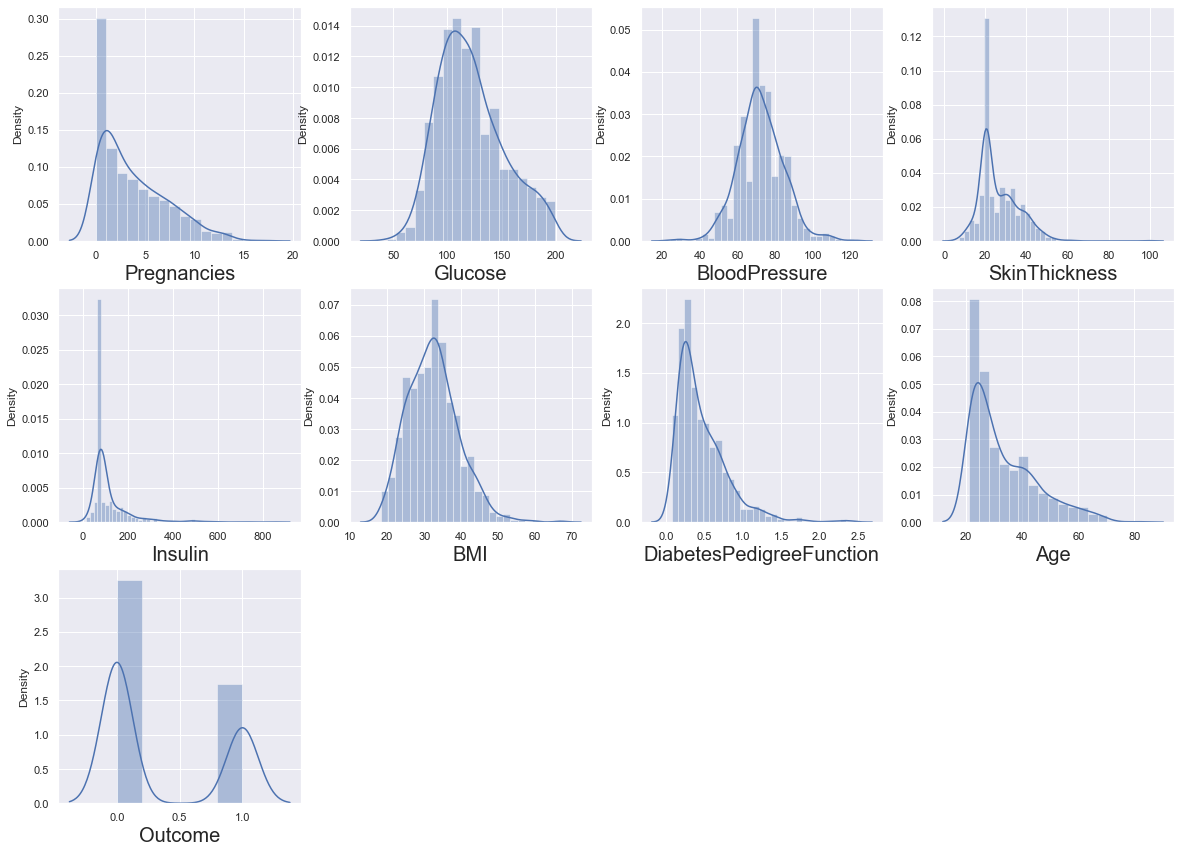

In [27]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <=9:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

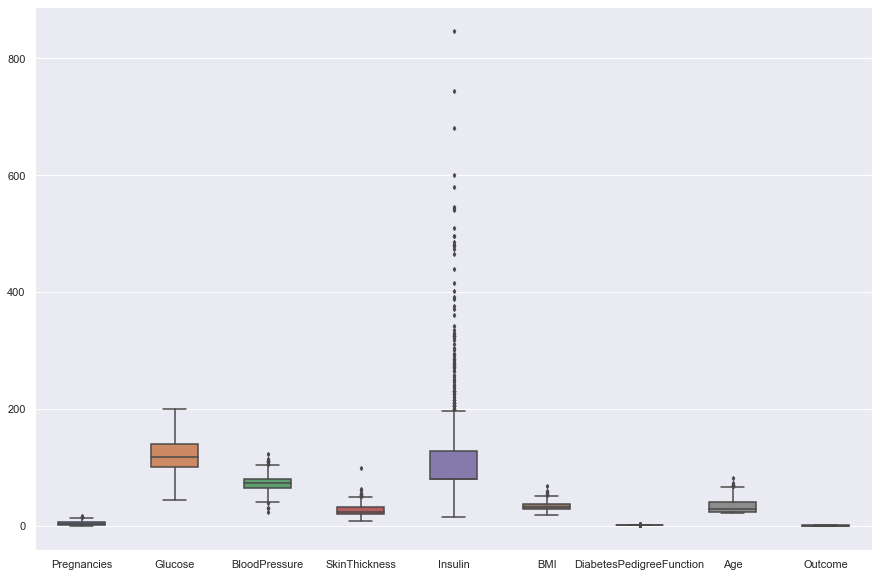

In [28]:
# figures show some outliers:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width=0.5, ax=ax, fliersize=3)

In [29]:
# fixing outliers from SkinThickness and Insulin:
q = data['Pregnancies'].quantile(0.99)
# Removing top 1% of Pregnancies columns:
data_cleaned = data[data['Pregnancies']<q]

q = data_cleaned['BMI'].quantile(0.99)
# Removing 1% top BMI data
data_cleaned = data_cleaned[data_cleaned['BMI']<q]

q = data_cleaned['SkinThickness'].quantile(0.96)
# Removing 4% top SkinThickness data
data_cleaned = data_cleaned[data_cleaned['SkinThickness']<q]

q = data_cleaned['Insulin'].quantile(0.93)
# Removing 7% top Insulin data
data_cleaned = data_cleaned[data_cleaned['Insulin']<q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# Removing 1% top Diabetese data
data_cleaned = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(0.99)
# Removing 1% top Age data
data_cleaned = data_cleaned[data_cleaned['Age']<q]


C:\Users\Salman\anacondaUpdated\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Salman\anacondaUpdated\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Salman\anacondaUpdated\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

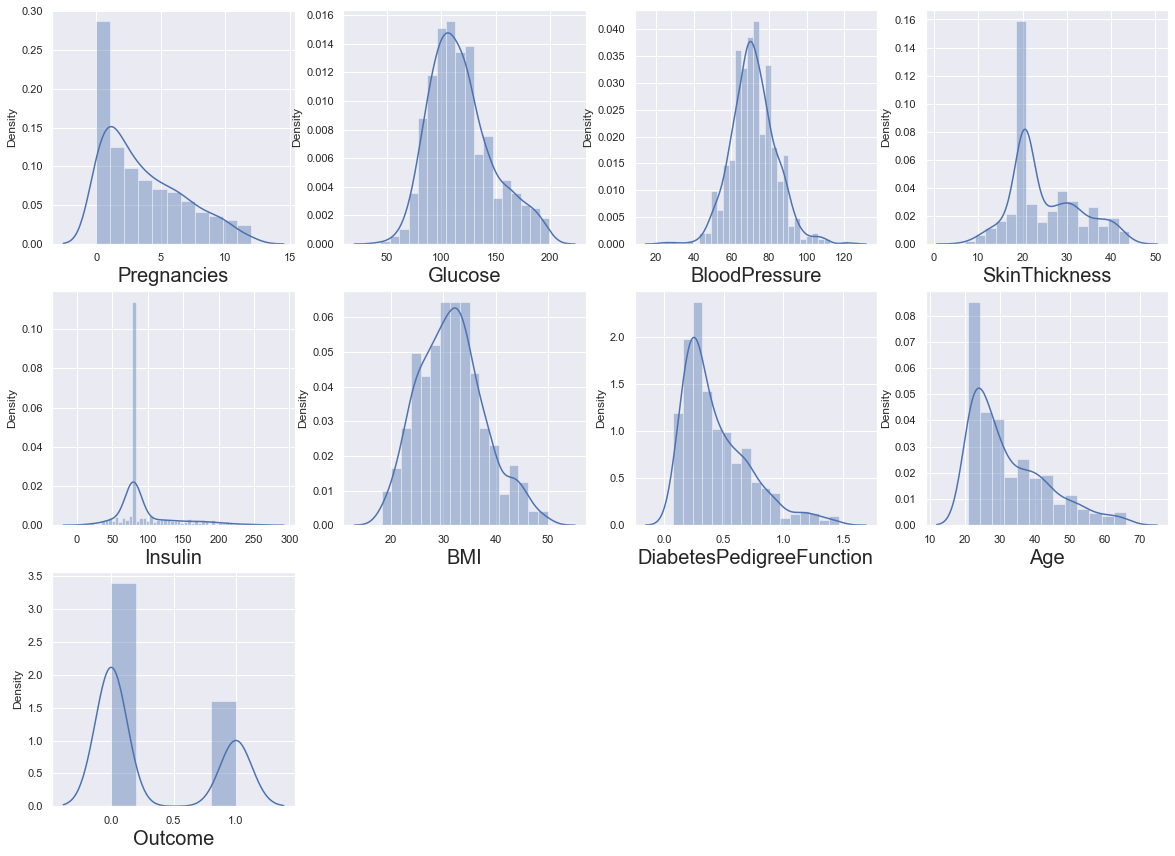

In [31]:
# Checking for distribution again:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber <=9:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [33]:
# Distributing data in x and y datasets:
x = data_cleaned.drop(columns=['Outcome'])
y = data_cleaned['Outcome']

In [34]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30
...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


C:\Users\Salman\anacondaUpdated\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salman\anacondaUpdated\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salman\anacondaUpdated\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

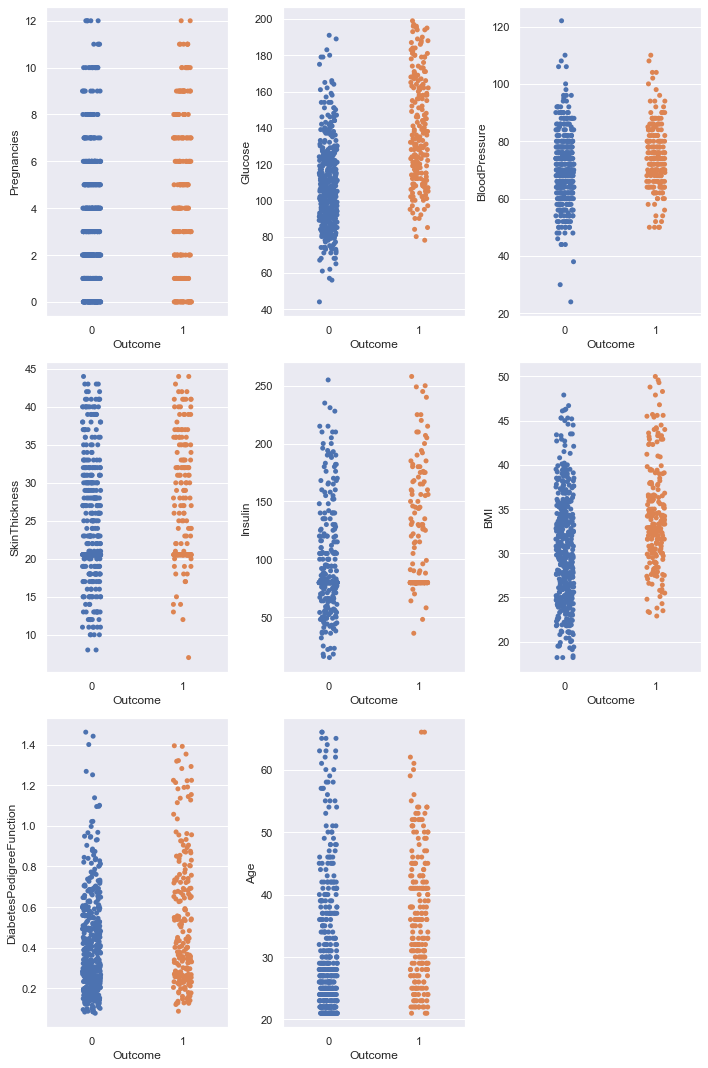

In [41]:
# Lets see how data is distributed in x and y

plt.figure(figsize=(10,15), facecolor='White')
plotnumber = 1

for column in x:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

In [43]:
# Standardizing the data:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [44]:
x_scaled

array([[ 0.7357173 ,  1.01662857,  0.01164174, ...,  0.31225924,
         0.66490115,  1.6031193 ],
       [-0.87677963, -1.14642705, -0.49829621, ..., -0.79914274,
        -0.32227597, -0.13810225],
       [ 1.38071607,  2.21832614, -0.66827553, ..., -1.32308938,
         0.82585394, -0.04645901],
       ...,
       [ 0.41321791,  0.08960473,  0.01164174, ..., -0.86265142,
        -0.70140921, -0.22974549],
       [-0.87677963,  0.26127581, -1.00823416, ..., -0.24344175,
        -0.32942943,  1.32818958],
       [-0.87677963, -0.87175332, -0.15833757, ..., -0.19581023,
        -0.4510382 , -0.87124817]])

In [48]:
vif = pd.DataFrame()
vif['Vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns

vif # Now showing no multicolinearity

,Vif,Features
0,1.469580,Pregnancies
1,1.277769,Glucose
2,1.265967,BloodPressure
3,1.392455,SkinThickness
4,1.213775,Insulin
5,1.460919,BMI
6,1.043097,DiabetesPedigreeFunction
7,1.687140,Age


In [49]:
# Calling train and test split:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3)

In [50]:
# Fitting the data into KNN Model to see how it performs:

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [51]:
y_pred = knn.predict(x_test)

In [52]:
knn.score(x_train, y_train)

0.8185840707964602

In [60]:
print('The accuracy score is: ', accuracy_score(y_test, y_pred)*100,'%')

The accuracy score is:  74.35897435897436 %


##### Tuning the Hyperparameters to get the best accuracy:

In [63]:
param_grid = {
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [18,25,28,32,36],
    'n_neighbors': [3,4,5,6,7,9,11,13] 
}

In [64]:
grid_search = GridSearchCV(knn, param_grid, verbose=3)

In [65]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.791 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.756 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.722 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.700 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=4;, score=0.769 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=4;, score=0.736 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=4;, score=0.811 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=4;, score=0.778 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=4;, score=0.689 total 

[CV 5/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5;, score=0.722 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=6;, score=0.780 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=6;, score=0.725 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=6;, score=0.811 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=6;, score=0.789 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=6;, score=0.789 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=7;, score=0.791 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=7;, score=0.714 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=7;, score=0.767 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=7;, score=0.789 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=28, n_

[CV 2/5] END algorithm=ball_tree, leaf_size=36, n_neighbors=11;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=36, n_neighbors=11;, score=0.789 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=36, n_neighbors=11;, score=0.811 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=36, n_neighbors=11;, score=0.789 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=36, n_neighbors=13;, score=0.802 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=36, n_neighbors=13;, score=0.769 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=36, n_neighbors=13;, score=0.800 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=36, n_neighbors=13;, score=0.811 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=36, n_neighbors=13;, score=0.756 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=3;, score=0.791 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1

[CV 2/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=5;, score=0.714 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=5;, score=0.833 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=5;, score=0.756 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=5;, score=0.722 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=6;, score=0.780 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=6;, score=0.725 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=6;, score=0.811 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=6;, score=0.789 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=6;, score=0.789 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=7;, score=0.791 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=7;, score=0.

[CV 3/5] END algorithm=kd_tree, leaf_size=36, n_neighbors=7;, score=0.767 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=36, n_neighbors=7;, score=0.789 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=36, n_neighbors=7;, score=0.767 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=36, n_neighbors=9;, score=0.791 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=36, n_neighbors=9;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=36, n_neighbors=9;, score=0.778 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=36, n_neighbors=9;, score=0.811 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=36, n_neighbors=9;, score=0.767 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=36, n_neighbors=11;, score=0.802 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=36, n_neighbors=11;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=36, n_neighbors=11;, score

[CV 3/5] END algorithm=brute, leaf_size=28, n_neighbors=3;, score=0.756 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=28, n_neighbors=3;, score=0.722 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=28, n_neighbors=3;, score=0.700 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=28, n_neighbors=4;, score=0.769 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=28, n_neighbors=4;, score=0.736 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=28, n_neighbors=4;, score=0.811 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=28, n_neighbors=4;, score=0.778 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=28, n_neighbors=4;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=28, n_neighbors=5;, score=0.769 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=28, n_neighbors=5;, score=0.714 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=28, n_neighbors=5;, score=0.833 total time=   0.0s

[CV 5/5] END algorithm=brute, leaf_size=36, n_neighbors=6;, score=0.789 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=36, n_neighbors=7;, score=0.791 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=36, n_neighbors=7;, score=0.714 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=36, n_neighbors=7;, score=0.767 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=36, n_neighbors=7;, score=0.789 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=36, n_neighbors=7;, score=0.767 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=36, n_neighbors=9;, score=0.791 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=36, n_neighbors=9;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=36, n_neighbors=9;, score=0.778 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=36, n_neighbors=9;, score=0.811 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=36, n_neighbors=9;, score=0.767 total time=   0.0s

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 25, 28, 32, 36],
                         'n_neighbors': [3, 4, 5, 6, 7, 9, 11, 13]},
             verbose=3)

In [66]:
grid_search.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 11}

In [67]:
# Lets use the best parameters in KNN algo:

knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=11)

In [68]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=11)

In [71]:
knn.score(x_train,y_train)

0.8185840707964602

In [72]:
knn.score(x_test,y_test)

0.7282051282051282

In [78]:
# Saving the models:
import pickle

with open('KNN_ModelForPrediction.sav', 'wb') as f:
    pickle.dump(knn,f)
    
with open('knn_standardscaler.sav', 'wb') as f:
    pickle.dump(scaler,f)